AttributeError: 'DBSCAN' object has no attribute 'cluster_centers_'

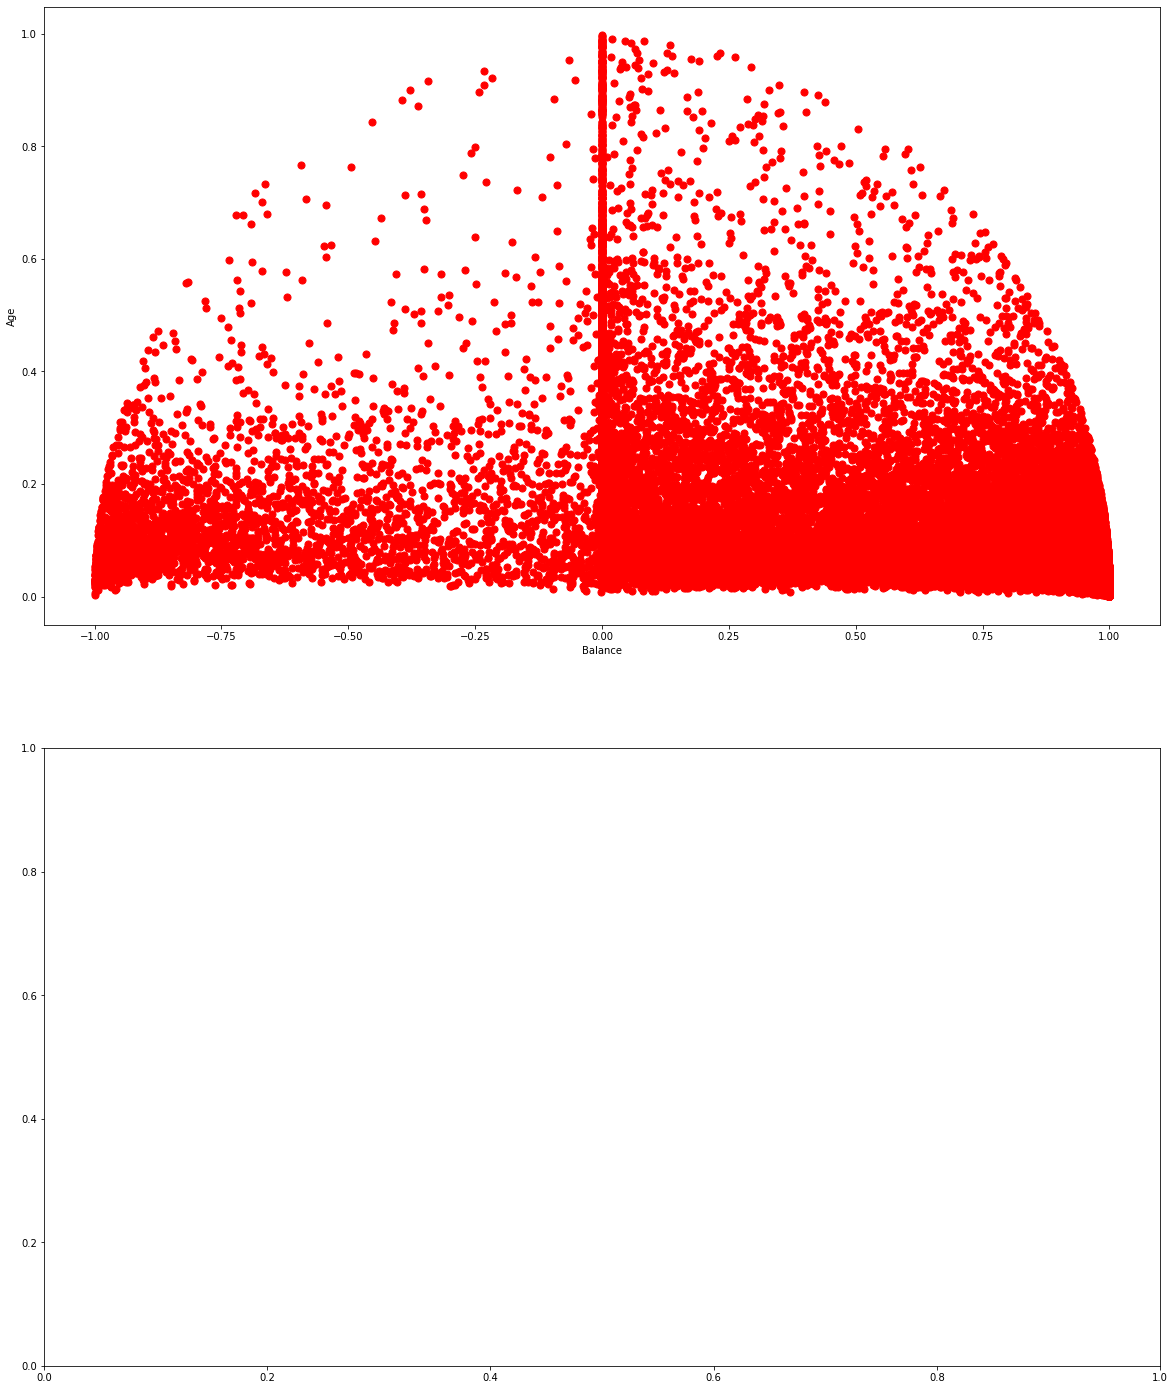

In [447]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import normalize
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from numpy import concatenate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

from sklearn.cluster import AgglomerativeClustering



S = pd.read_csv('C:/Users/aless/Desktop/BankCustomerData.csv')

S['job']=S['job'].astype('category').cat.codes
S['marital']=S['marital'].astype('category').cat.codes
S['education']=S['education'].astype('category').cat.codes
S['default']=S['default'].astype('category').cat.codes
S['housing']=S['housing'].astype('category').cat.codes
S['loan']=S['loan'].astype('category').cat.codes
S['contact']=S['contact'].astype('category').cat.codes
S['month']=S['month'].astype('category').cat.codes
S['poutcome']=S['poutcome'].astype('category').cat.codes
S['term_deposit']=S['term_deposit'].astype('category').cat.codes



"""
#PCA
pca = PCA(n_components=2)
pca.fit(S)
S = PCA.transform(pca,S)

"""
S = S[["balance","age","duration"]] #teoricamente alto balance più tempo sta al telefono
S = normalize(S, norm='l2', axis=1, copy=True, return_norm=False) #NOTA BENE : SENZA NORMALIZZAZIONE IL CLUSTERING AVVIENE SOLO IN BASE A BALANCE IN QUANTO E' SU UNA SCALA MOLTO PIU ALTA RISPETTO LE ALTRE FEATURES

#S = S.loc[np.random.permutation(S.index)[:150]]  #SUBSAMPLE da 42k a 20k




#Elbow curve analysis
"""
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(S)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5)).gca()
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(range(2, 20), distorsions)

plt.grid(True)
plt.title('Elbow curve')
"""

#Silhouette analisi
"""
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(S)
    score = silhouette_score(S, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
"""

#clustering = KMeans(n_clusters = 4,init='k-means++')
clustering = DBSCAN(eps = 1, min_samples = 10)

label = clustering.fit_predict(S)



filtered_label0 = S[label == 0]
 
filtered_label1 = S[label == 1]

filtered_label2 = S[label == 2]

filtered_label3 = S[label == 3]


fig, axs = plt.subplots(2)
fig.set_figheight(25)
fig.set_figwidth(20)

axs[0].set(xlabel="Balance", ylabel="Age")
axs[0].scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red',s = 50, label = "Cluster 1")
axs[0].scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'cyan',s = 50, label = "Cluster 2")
axs[0].scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green',s = 50, label = "Cluster 3")
axs[0].scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'orange', s = 50, label = "Cluster 4")
#axs[0].scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], color = 'blue', s = 100)



axs[1].set(xlabel="Balance", ylabel="Duration")
axs[1].scatter(filtered_label0[:,0] , filtered_label0[:,2] , color = 'red',s = 50, label = "Cluster 1")
axs[1].scatter(filtered_label1[:,0] , filtered_label1[:,2] , color = 'cyan',s = 50, label = "Cluster 2")
axs[1].scatter(filtered_label2[:,0] , filtered_label2[:,2] , color = 'green',s = 50, label = "Cluster 3")
axs[1].scatter(filtered_label3[:,0] , filtered_label3[:,2] , color = 'orange',s = 50, label = "Cluster 4")
#xaxs[1].scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,2], color = 'blue', s = 100)
axs[0].legend()

axs[1].legend()

"""
axs[2].set(xlabel="Age", ylabel="Duration")
axs[2].scatter(filtered_label0[:,0] , filtered_label0[:,2] , color = 'red')
axs[2].scatter(filtered_label1[:,0] , filtered_label1[:,2] , color = 'black')
axs[2].scatter(filtered_label2[:,0] , filtered_label2[:,2] , color = 'green')
axs[2].scatter(filtered_label3[:,0] , filtered_label3[:,2] , color = 'yellow')
"""
